In [68]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


     Microchip_Test_1  Microchip_Test_2  accepted
0            0.051267          0.699560         1
1           -0.092742          0.684940         1
2           -0.213710          0.692250         1
3           -0.375000          0.502190         1
4           -0.513250          0.465640         1
5           -0.524770          0.209800         1
6           -0.398040          0.034357         1
7           -0.305880         -0.192250         1
8            0.016705         -0.404240         1
9            0.131910         -0.513890         1
10           0.385370         -0.565060         1
11           0.529380         -0.521200         1
12           0.638820         -0.243420         1
13           0.736750         -0.184940         1
14           0.546660          0.487570         1
15           0.322000          0.582600         1
16           0.166470          0.538740         1
17          -0.046659          0.816520         1
18          -0.173390          0.699560         1


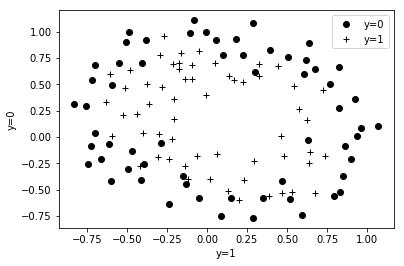

In [85]:
df=pd.read_csv(r"C:\Users\user\Documents\Machine learning\machine-learning-ex2\ex2\ex2data2.txt",header=None,names = ['Microchip_Test_1','Microchip_Test_2','accepted']  )
neg=df[df['accepted']==0]
pos=df[df['accepted']==1]
print(df)
def plotData():
    plt.plot(neg['Microchip_Test_1'],neg['Microchip_Test_2'],'ko',label='y=0')
    plt.plot(pos['Microchip_Test_1'],pos['Microchip_Test_2'],'k+',label='y=1')
    plt.xlabel('y=1')
    plt.ylabel('y=0')
    plt.legend()
plotData()

In [70]:
x1 = np.array(df['Microchip_Test_1'])
x2 = np.array(df['Microchip_Test_2'])
y = np.array(df['accepted'])

#creating the matrix X by adding column of ones

lst = [1 for i in range(len(x1))]
X = np.array([lst,x1,x2])
X=X.transpose()
print(X)

Y = y.reshape(len(y),1)
print(Y)

[[ 1.         0.051267   0.69956  ]
 [ 1.        -0.092742   0.68494  ]
 [ 1.        -0.21371    0.69225  ]
 [ 1.        -0.375      0.50219  ]
 [ 1.        -0.51325    0.46564  ]
 [ 1.        -0.52477    0.2098   ]
 [ 1.        -0.39804    0.034357 ]
 [ 1.        -0.30588   -0.19225  ]
 [ 1.         0.016705  -0.40424  ]
 [ 1.         0.13191   -0.51389  ]
 [ 1.         0.38537   -0.56506  ]
 [ 1.         0.52938   -0.5212   ]
 [ 1.         0.63882   -0.24342  ]
 [ 1.         0.73675   -0.18494  ]
 [ 1.         0.54666    0.48757  ]
 [ 1.         0.322      0.5826   ]
 [ 1.         0.16647    0.53874  ]
 [ 1.        -0.046659   0.81652  ]
 [ 1.        -0.17339    0.69956  ]
 [ 1.        -0.47869    0.63377  ]
 [ 1.        -0.60541    0.59722  ]
 [ 1.        -0.62846    0.33406  ]
 [ 1.        -0.59389    0.005117 ]
 [ 1.        -0.42108   -0.27266  ]
 [ 1.        -0.11578   -0.39693  ]
 [ 1.         0.20104   -0.60161  ]
 [ 1.         0.46601   -0.53582  ]
 [ 1.         0.67339   -0.5

In [71]:
### note to self  ## this has a minor error in X although it looks long but ....
'''
def mapFeature(x1, x2):
    return np.c_[X,x1*x2]

for i in range(5):
    print(i)
    X=mapFeature(X[:,1], X[:,(i+2)])
print(X)

for i in range(5):
    print(i)
    X=mapFeature(X[:,2], X[:,(i+2)])
print(X)    

for i in range(4):
    print(i)
    X=mapFeature(X[:,1], X[:,1]**(i+2))
print(X)    

for i in range(5):
    print(i)
    X=mapFeature(X[:,2], X[:,2]**(i+1))
print(X)    

for i in range(3):
    print(i)
    X=mapFeature(X[:,1]**2, X[:,2]**(i+2))
print(X)    

for i in range(2):
    print(i)
    X=mapFeature(X[:,1]**3, X[:,2]**(i+2))
print(X)    

X=mapFeature(X[:,1]**4, X[:,2]**2)
'''
##################        OR           ##############

#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out


#Create feature-mapped X matrix
X = mapFeature(X[:,1],X[:,2])
X

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [72]:
#######  FUNCTION FOR CALCULATING THE SIGMOID

def sigmoid(x):
    ##IF X IS INTEGER
    if type(x) == int:  
        y=1/(1+np.exp(-x))
        return y

    elif type(x) == type([]): 
        
        for i in range(len(x)):
            x[i]=1/(1+np.exp(-x[i]))
        return x
    
    elif type(x) == np.ndarray: 
        y=np.zeros(x.shape)
        y=1/(1+np.exp(-x))
        
        return y
    
print (sigmoid(-6))

print(sigmoid([1,0,-56,4]))

n=np.array([[1,0.2,4,5],[4,5,6,7],[8,3,4,2]])

print(sigmoid(n))

0.0024726231566347743
[0.7310585786300049, 0.5, 4.780892883885469e-25, 0.9820137900379085]
[[0.73105858 0.549834   0.98201379 0.99330715]
 [0.98201379 0.99330715 0.99752738 0.99908895]
 [0.99966465 0.95257413 0.98201379 0.88079708]]


In [73]:
####  COMPUTING COST FUNCTION

In [74]:

x1=[x1[i] for i in range(len(x1))] ####  CONVERTING ARRAY TO LIST
x2=[x2[i] for i in range(len(x2))] ####  CONVERTING ARRAY TO LIST
#print(x1)

#print(x2)


In [75]:
##### defining the hypothesis

def hypothesis(theta,X):
   ## theta_transpose=theta.transpose()
    ## minus theta_transpose*X
#   print(theta_transpose)
#   print(theta)
      ## theta_transpose*X
#   print(a)
    
  # print(type(a))
    hypo=sigmoid(X.dot(theta))    ####calling the sigmoid function
    return hypo

### Initializing theta
theta = np.ones((len(X[1]),1))
print(theta.shape)

#theta = np.array([[-24,0.2,0.2]])    ##theta values

hypo=hypothesis(theta,X)         #####returning the hyposthesis array  
len(hypo)


(28, 1)


118

In [76]:
lmd=10

def computeCost(theta,X,Y,mylambda=0.):
    term1 = np.dot(-np.array(Y).T,np.log(hypothesis(theta,X)))    #### storing the first term
    term2 = np.dot((1-np.array(Y)).T,np.log(1-hypothesis(theta,X)))    #### storing the second term
    regterm = (mylambda/2) * (-theta[0]**2+np.sum(theta**2)) #Skip theta0        most important thing to note that summation 
    return float( (1/len(Y)) * ( np.sum(term1 - term2) + regterm ) )        ##start from theta zero so we subtracted theta[0]^2
computeCost(theta,X,Y,10)


3.16450933161501

In [77]:
#######    GRADIENT   %%%%%%%

def gradient(Y,theta,X,lmd):
    
    a= ((X.transpose()).dot(hypothesis(theta,X)-Y) + lmd*theta)/len(Y)
    a[0]=a[0]-(lmd*theta[0])/len(Y)
    return a

    ###calling gradient function
gradient(Y,theta,X,lmd)

array([[0.34604507],
       [0.16135192],
       [0.19479576],
       [0.22686278],
       [0.09218568],
       [0.24438558],
       [0.14339212],
       [0.10844171],
       [0.10231439],
       [0.18346846],
       [0.17353003],
       [0.08725552],
       [0.11822776],
       [0.0858433 ],
       [0.19994895],
       [0.13522653],
       [0.09497527],
       [0.09356441],
       [0.09979784],
       [0.09140157],
       [0.17485242],
       [0.14955442],
       [0.08678566],
       [0.09897686],
       [0.08531951],
       [0.10190666],
       [0.08450198],
       [0.18228323]])

In [78]:
##########  OPTIMIZING AND CALCULATING BEST THETA VALUES

In [89]:
from scipy.optimize import minimize


print(theta.shape)
from scipy import optimize

######   this optimize function optimizes the function over number of iterations and tell us the best possible theta 
######   and the minimum cost
def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun


(1, 28)


In [80]:
Y = Y.ravel()
print(theta.shape)
print(theta)
theta, mincost= optimizeTheta(theta,X,Y,lmd)
print(theta)
mincost

(28, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(28, 1)
[[ 0.32615789 -0.00814838  0.16575421 -0.44671006 -0.11175274 -0.27886911
  -0.07145578 -0.05789933 -0.06508958 -0.10635766 -0.33673528 -0.01297032
  -0.11671342 -0.0280932  -0.28598682 -0.11615419 -0.03705333 -0.02242707
  -0.04887303 -0.04162845 -0.18672604 -0.25334727 -0.00291553 -0.05797643
  -0.00053415 -0.06353552 -0.01206567 -0.27144419]]


0.6482157020085282

In [81]:
########    PLOTTING THE DECISION BOUNDARY   #######

In [82]:
def plot_Decision_boundary(theta,X,Y,mylambda=0.):
    xvals=np.linspace(-1,1.5,50)
    yvals=np.linspace(-1,1.5,50)
    zvals=np.zeros((len(xvals),len(yvals)))
    theta, mincost= optimizeTheta(theta,X,Y,mylambda)
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j]=np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()
    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
#Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")    


(1, 28)
(1, 28)
(1, 28)
(1, 28)


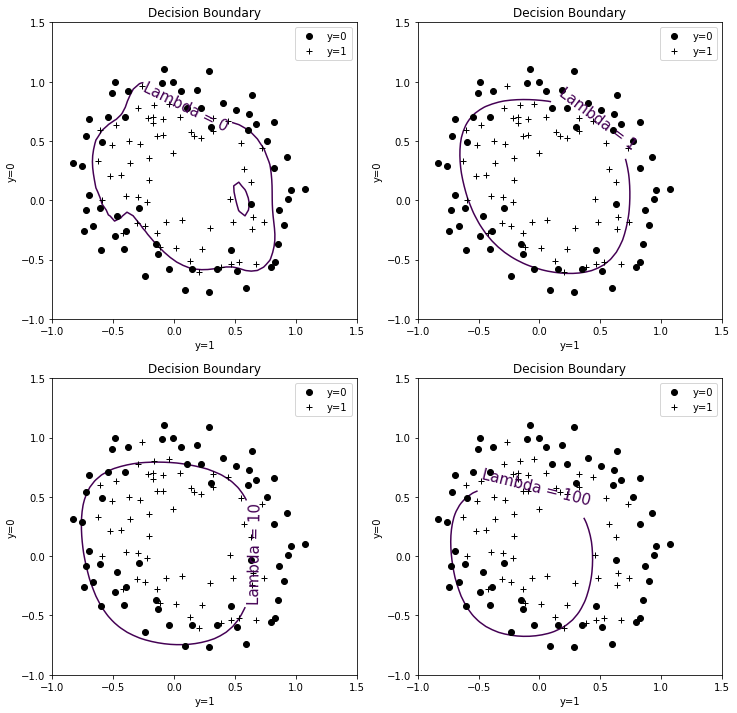

In [88]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,12))
plt.subplot(221)
plotData()
plot_Decision_boundary(theta,X,Y,0)

plt.subplot(222)
plotData()
plot_Decision_boundary(theta,X,Y,1)

plt.subplot(223)
plotData()
plot_Decision_boundary(theta,X,Y,10)

plt.subplot(224)
plotData()
plot_Decision_boundary(theta,X,Y,100)
